In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Results.csv')

In [3]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400


In [4]:
df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           1
dtype: int64

In [5]:
df.dropna(inplace=True)

<AxesSubplot:>

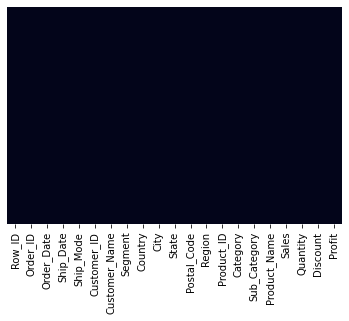

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9993 non-null   int64  
 1   Order_ID       9993 non-null   object 
 2   Order_Date     9993 non-null   object 
 3   Ship_Date      9993 non-null   object 
 4   Ship_Mode      9993 non-null   object 
 5   Customer_ID    9993 non-null   object 
 6   Customer_Name  9993 non-null   object 
 7   Segment        9993 non-null   object 
 8   Country        9993 non-null   object 
 9   City           9993 non-null   object 
 10  State          9993 non-null   object 
 11  Postal_Code    9993 non-null   int64  
 12  Region         9993 non-null   object 
 13  Product_ID     9993 non-null   object 
 14  Category       9993 non-null   object 
 15  Sub_Category   9993 non-null   object 
 16  Product_Name   9993 non-null   object 
 17  Sales          9993 non-null   float64
 18  Quantity

In [8]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Ship_Date']=pd.to_datetime(df['Ship_Date'])

In [9]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<AxesSubplot:xlabel='Country', ylabel='count'>

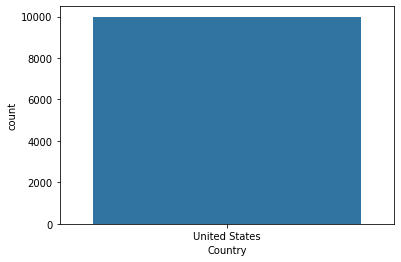

In [10]:
sns.countplot(x='Country',data=df)

<AxesSubplot:xlabel='Region', ylabel='count'>

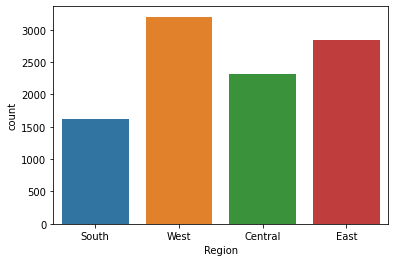

In [11]:
sns.countplot(x='Region',data=df) # use the geo maps

<AxesSubplot:xlabel='State', ylabel='count'>

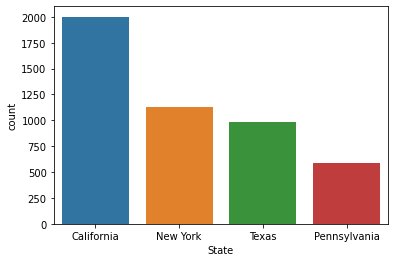

In [12]:
sns.countplot(x='State',data=df,order=df.State.value_counts().iloc[:4].index)

<AxesSubplot:xlabel='City', ylabel='count'>

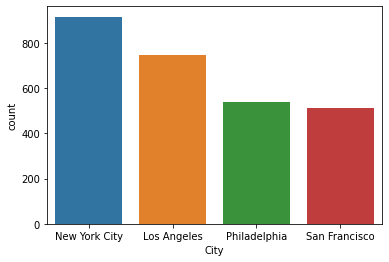

In [13]:
sns.countplot(x='City',data=df,order=df.City.value_counts().iloc[:4].index)

<AxesSubplot:xlabel='Category', ylabel='count'>

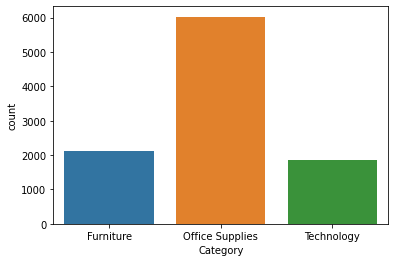

In [14]:
sns.countplot(x='Category',data=df)

<AxesSubplot:xlabel='Segment', ylabel='count'>

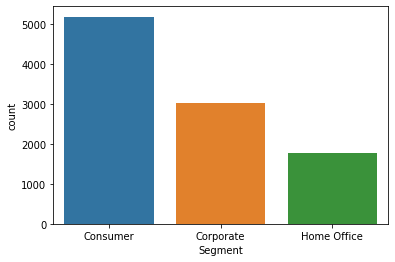

In [15]:
sns.countplot(x='Segment',data=df)

<AxesSubplot:xlabel='Sub_Category', ylabel='count'>

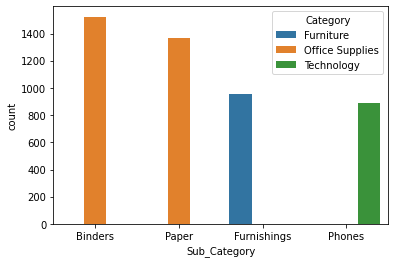

In [16]:
sns.countplot(x='Sub_Category',hue="Category",data=df,order=df.Sub_Category.value_counts().iloc[:4].index)

<AxesSubplot:xlabel='Ship_Mode', ylabel='count'>

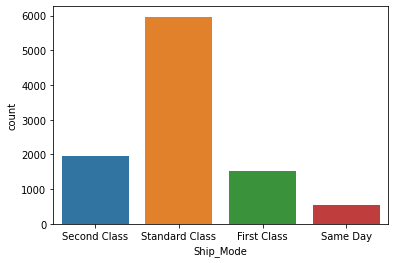

In [17]:
sns.countplot(x='Ship_Mode',data=df)

<AxesSubplot:xlabel='State', ylabel='count'>

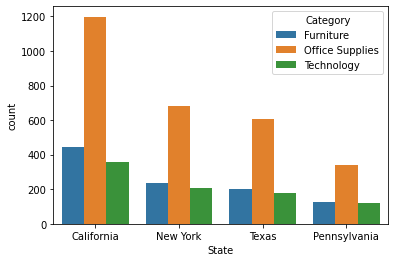

In [18]:
sns.countplot(x='State',hue='Category',data=df,order=df.State.value_counts().iloc[:4].index)

<AxesSubplot:xlabel='State', ylabel='count'>

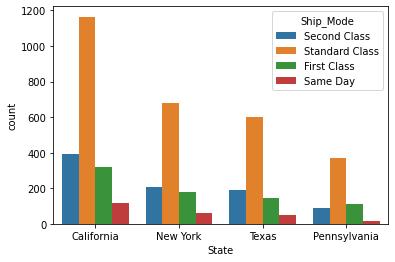

In [19]:
sns.countplot(x='State',hue='Ship_Mode',data=df,order=df.State.value_counts().iloc[:4].index)

In [20]:
state_profit=df.groupby('State')['Profit'].sum().reset_index().sort_values('Profit',ascending=False).iloc[:9]
state_profit

,State,Profit
3,California,76381.386935
30,New York,74038.548430
45,Washington,33402.651669
20,Michigan,24463.187780
44,Virginia,18597.950311
12,Indiana,18382.935908
9,Georgia,16250.043296
15,Kentucky,11199.696645
21,Minnesota,10823.187503


In [21]:
state_disc=df.groupby('State')['Discount'].sum().reset_index().sort_values('Discount',ascending=False).iloc[:9]
state_disc

,State,Discount
41,Texas,364.640007
36,Pennsylvania,192.900001
11,Illinois,191.900004
33,Ohio,152.400001
3,California,145.600002
8,Florida,114.200000
31,North Carolina,70.600000
1,Arizona,68.000000
30,New York,62.400001


In [22]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
df['delivery_by']=(df['Ship_Date']-df['Order_Date'])
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,delivery_by
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.247999,3,0.20,4.102800,2 days
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.959999,2,0.00,15.633200,5 days
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.575989,2,0.20,19.393200,5 days
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600000,4,0.00,13.320000,5 days


In [24]:
state_avg_delivery=df.groupby('State')['delivery_by'].mean().reset_index().sort_values('delivery_by')
state_avg_delivery

,State,delivery_by
32,North Dakota,2 days 20:34:17.142857142
46,West Virginia,3 days 00:00:00
16,Louisiana,3 days 01:08:34.285714285
37,Rhode Island,3 days 06:00:00
33,Ohio,3 days 10:53:59.232409381
25,Nebraska,3 days 12:00:00
38,South Carolina,3 days 14:17:08.571428571
5,Connecticut,3 days 14:20:29.268292682
10,Idaho,3 days 16:00:00
4,Colorado,3 days 16:21:05.934065934


In [25]:
best_cust=df.groupby(['Customer_ID','Customer_Name'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False).iloc[:9]
best_cust

,Customer_ID,Customer_Name,Quantity
349,JD-15895,Jonathan Doherty,150
787,WB-21850,William Brown,146
387,JL-15835,John Lee,143
606,PP-18955,Paul Prost,138
678,SC-20725,Steven Cartwright,133
275,EP-13915,Emily Phan,124
125,CB-12025,Cassandra Brandow,122
147,CK-12205,Chloris Kastensmidt,122
257,EH-13765,Edward Hooks,120


In [26]:
pro_bo=df.groupby(['State','Sub_Category']).size().sort_values(ascending=False).reset_index().iloc[:9]
pro_bo

,State,Sub_Category,0
0,California,Paper,289
1,California,Binders,276
2,California,Furnishings,191
3,New York,Binders,179
4,California,Phones,172
5,California,Art,165
6,California,Storage,160
7,Texas,Binders,153
8,New York,Paper,150


In [27]:
df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,delivery_by
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993
mean,4997.265086,55192.678475,229.808764,3.789353,0.156173,28.701793,3 days 22:59:28.658060642
std,2885.212415,32064.473984,623.256846,2.225111,0.206441,234.228826,1 days 17:56:27.006458389
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978027,0 days 00:00:00
25%,2499.000000,23223.000000,17.280001,2.000000,0.000000,1.731000,3 days 00:00:00
50%,4997.000000,56560.000000,54.480000,3.000000,0.200000,8.671000,4 days 00:00:00
75%,7496.000000,90008.000000,209.940002,5.000000,0.200000,29.364000,5 days 00:00:00
max,9994.000000,99301.000000,22638.480469,14.000000,0.800000,8399.975586,7 days 00:00:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row_ID         9993 non-null   int64          
 1   Order_ID       9993 non-null   object         
 2   Order_Date     9993 non-null   datetime64[ns] 
 3   Ship_Date      9993 non-null   datetime64[ns] 
 4   Ship_Mode      9993 non-null   object         
 5   Customer_ID    9993 non-null   object         
 6   Customer_Name  9993 non-null   object         
 7   Segment        9993 non-null   object         
 8   Country        9993 non-null   object         
 9   City           9993 non-null   object         
 10  State          9993 non-null   object         
 11  Postal_Code    9993 non-null   int64          
 12  Region         9993 non-null   object         
 13  Product_ID     9993 non-null   object         
 14  Category       9993 non-null   object         
 15  Sub_

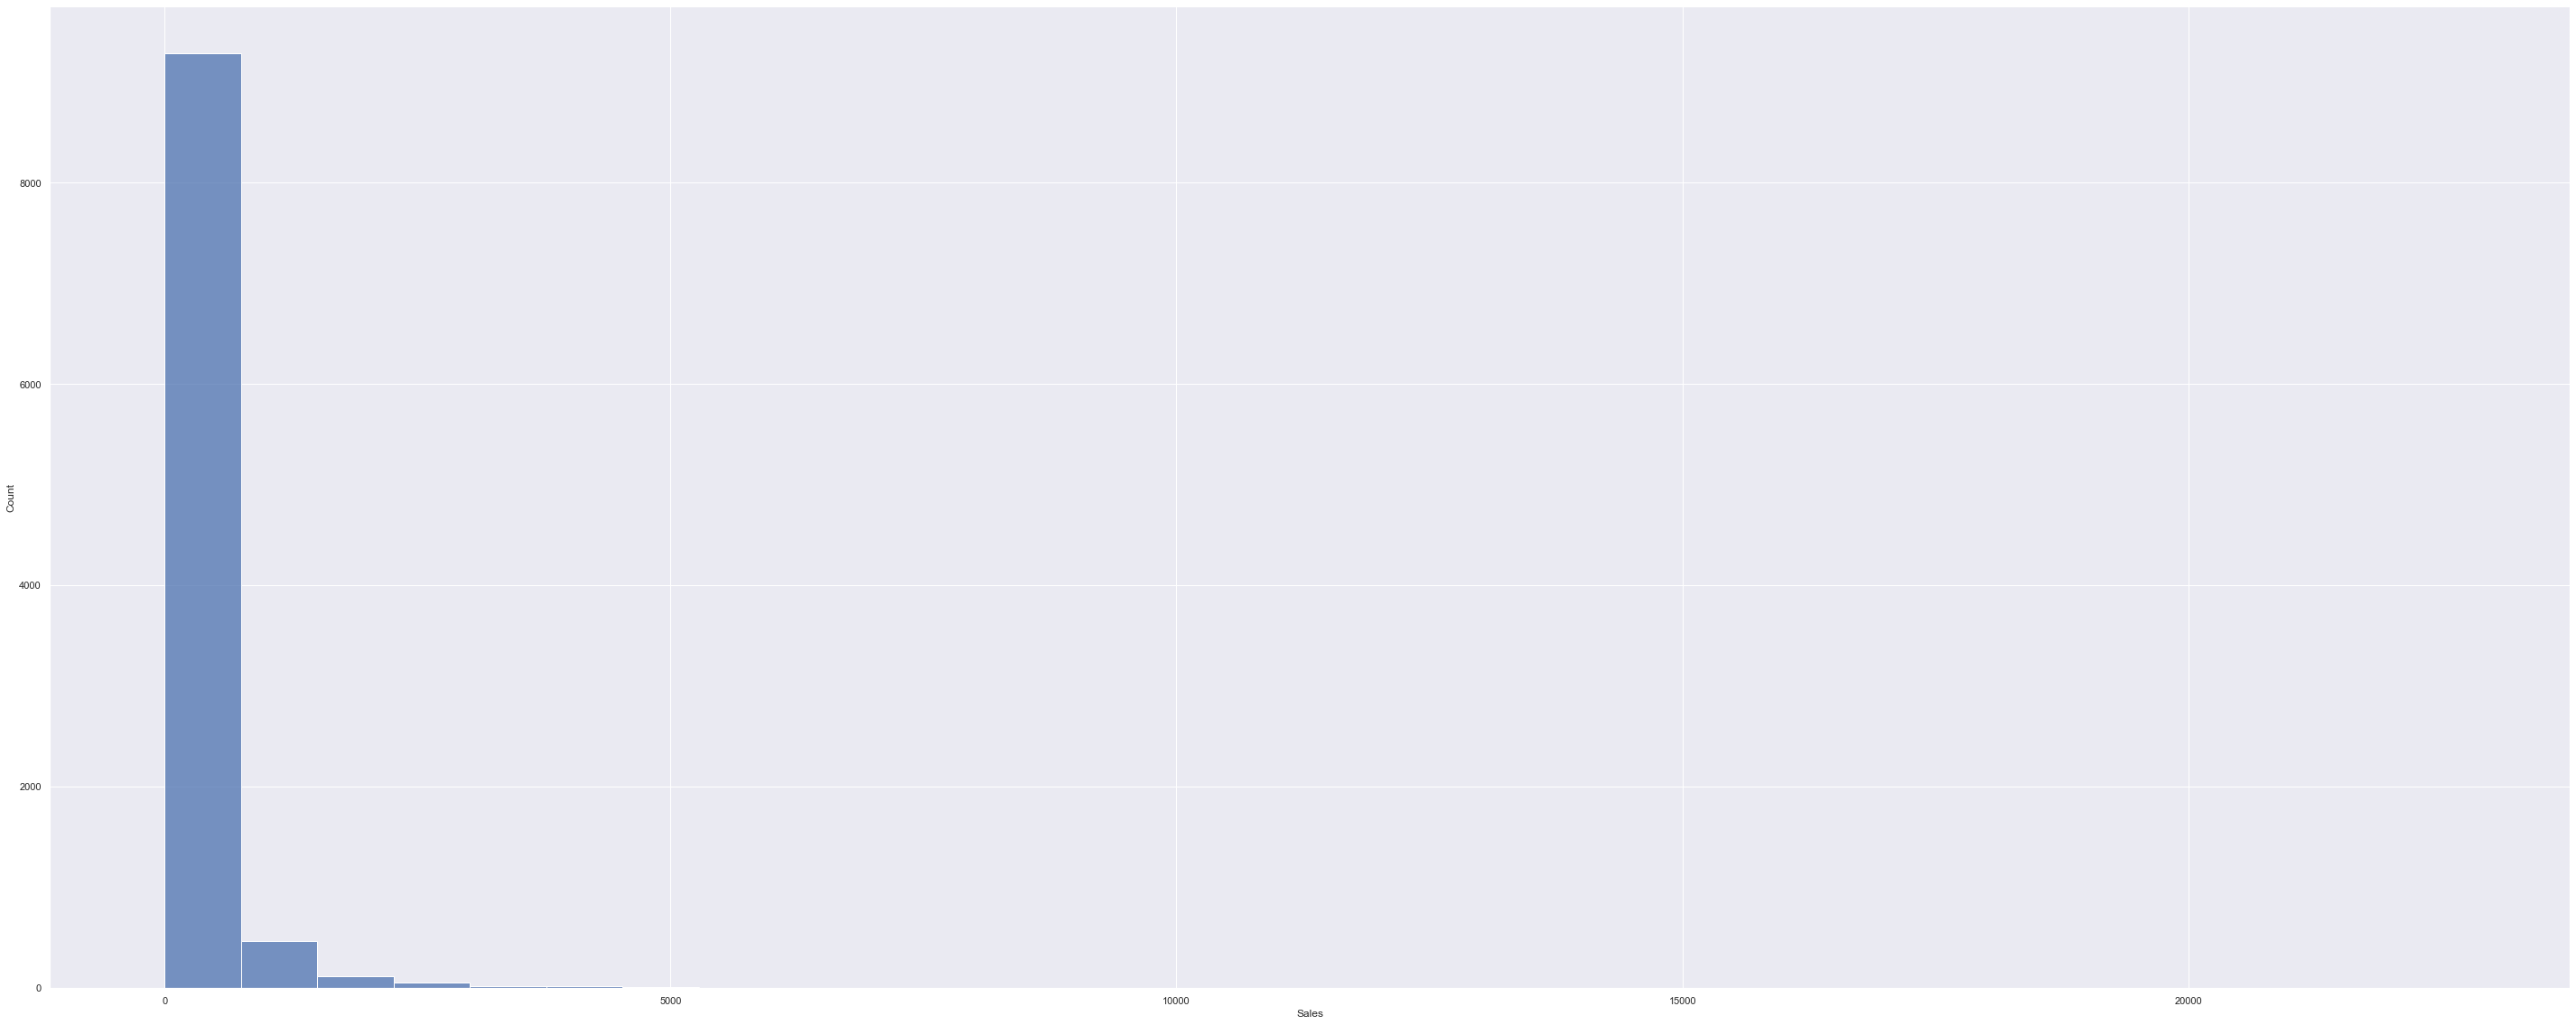

In [40]:
sns.histplot(x=('Sales'),data=df,bins=30)
sns.set(rc={'figure.figsize':(20,10)})

<AxesSubplot:xlabel='Sales'>

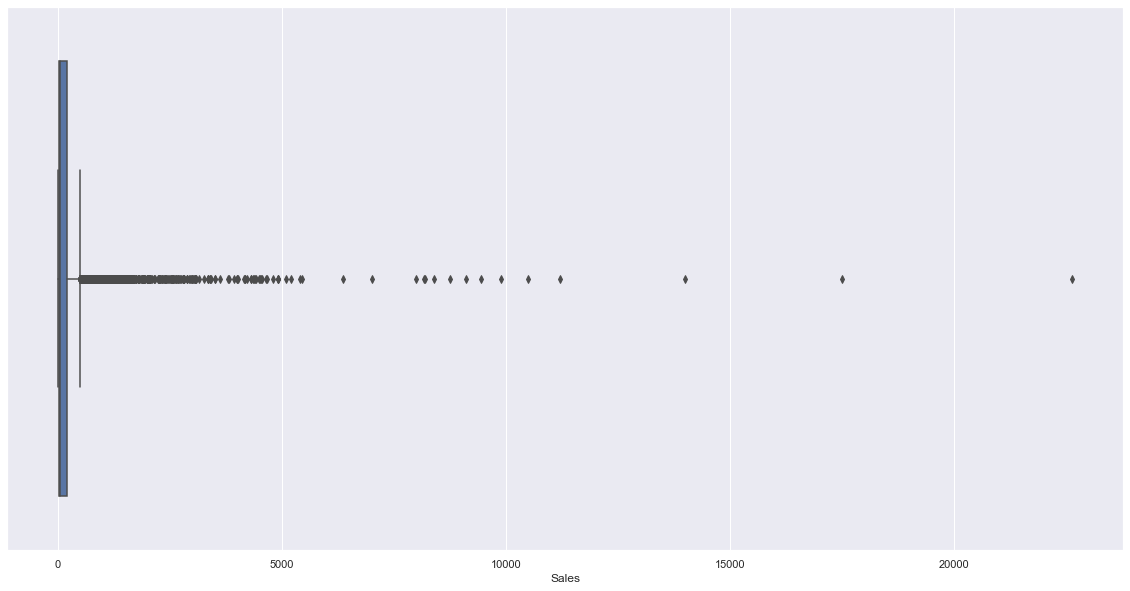

In [41]:
sns.boxplot(x='Sales',data=df)

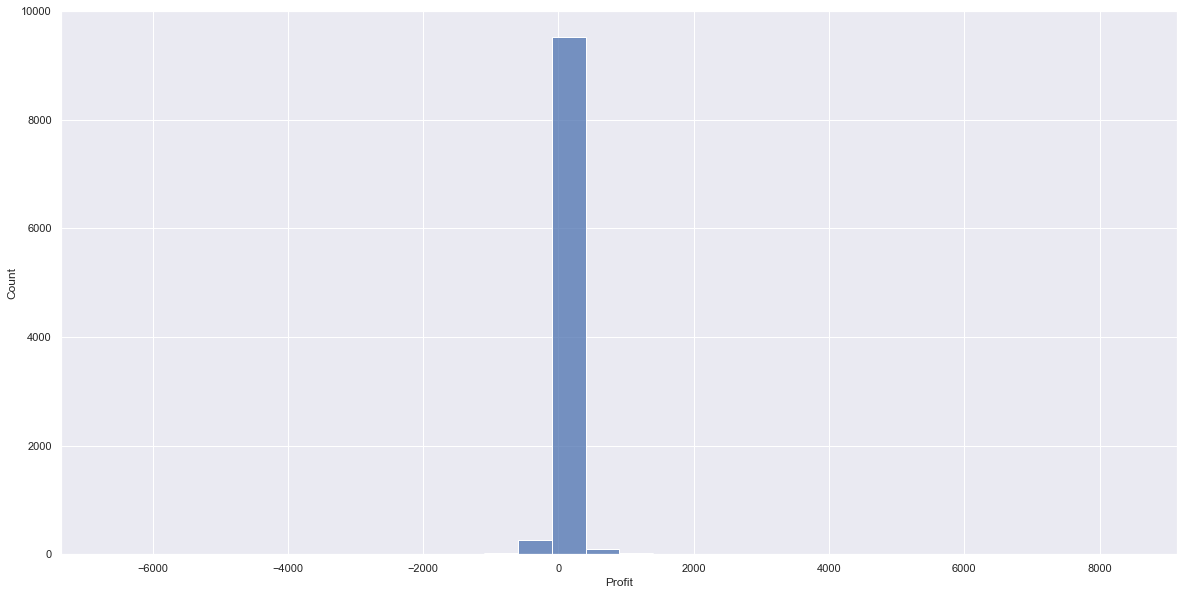

In [42]:
sns.histplot(x=('Profit'),data=df,bins=30)
sns.set(rc={'figure.figsize':(20,10)})

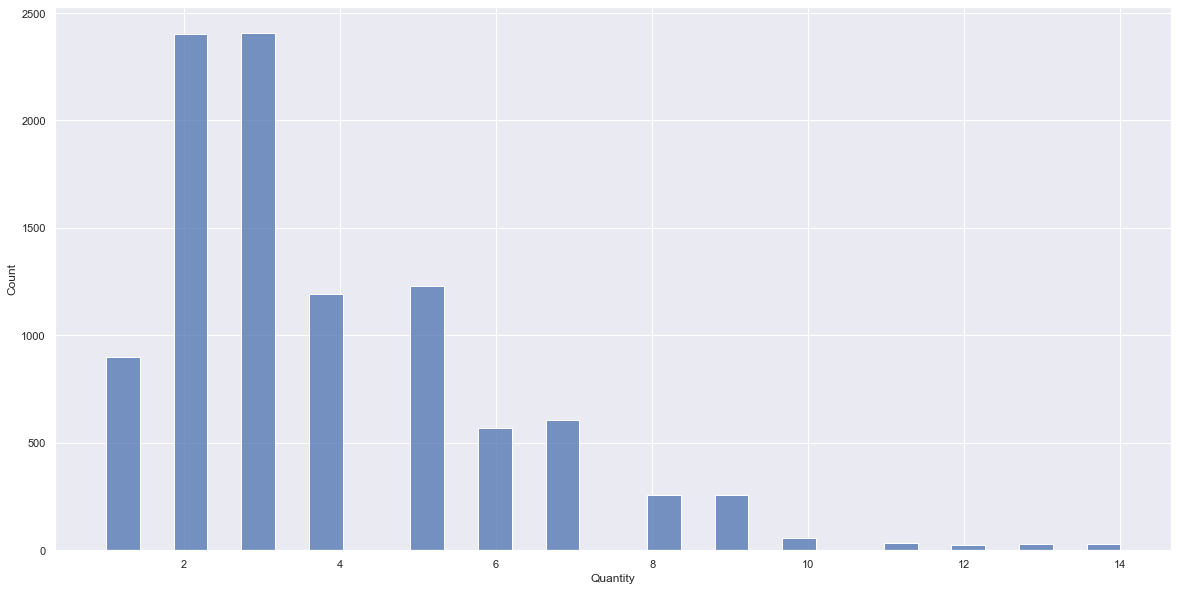

In [43]:
sns.histplot(x=('Quantity'),data=df,bins=30)
sns.set(rc={'figure.figsize':(20,10)})

<AxesSubplot:xlabel='Quantity'>

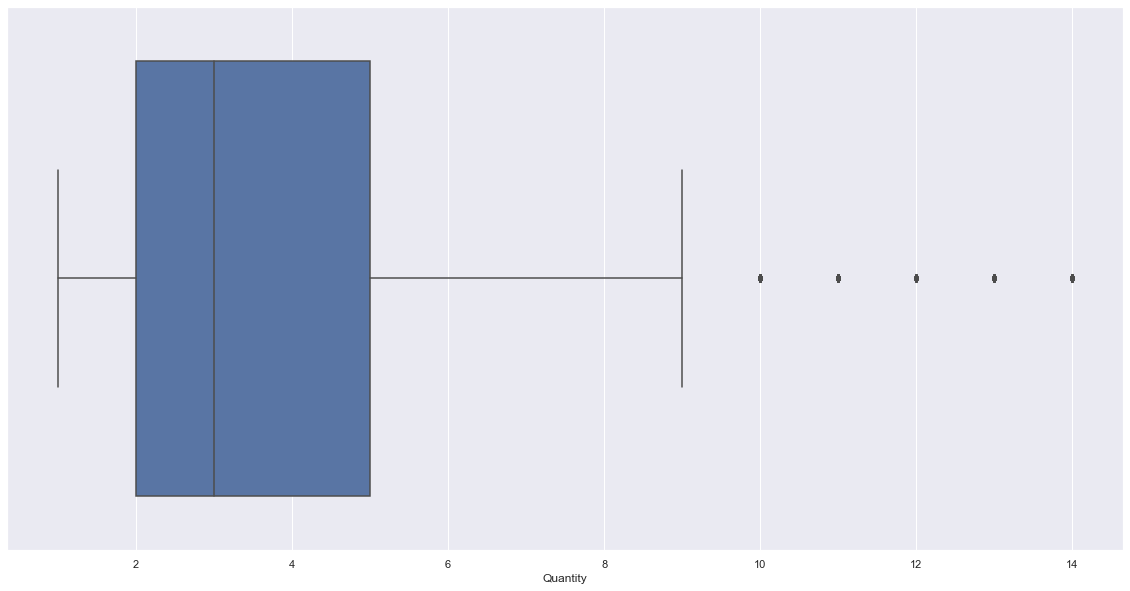

In [44]:
sns.boxplot(x='Quantity',data=df)

In [30]:
numarized=df

for col_name in numarized.columns:
    if (numarized[col_name].dtype =='object'):
        numarized[col_name]=numarized[col_name].astype('category')
        numarized[col_name]=numarized[col_name].cat.codes

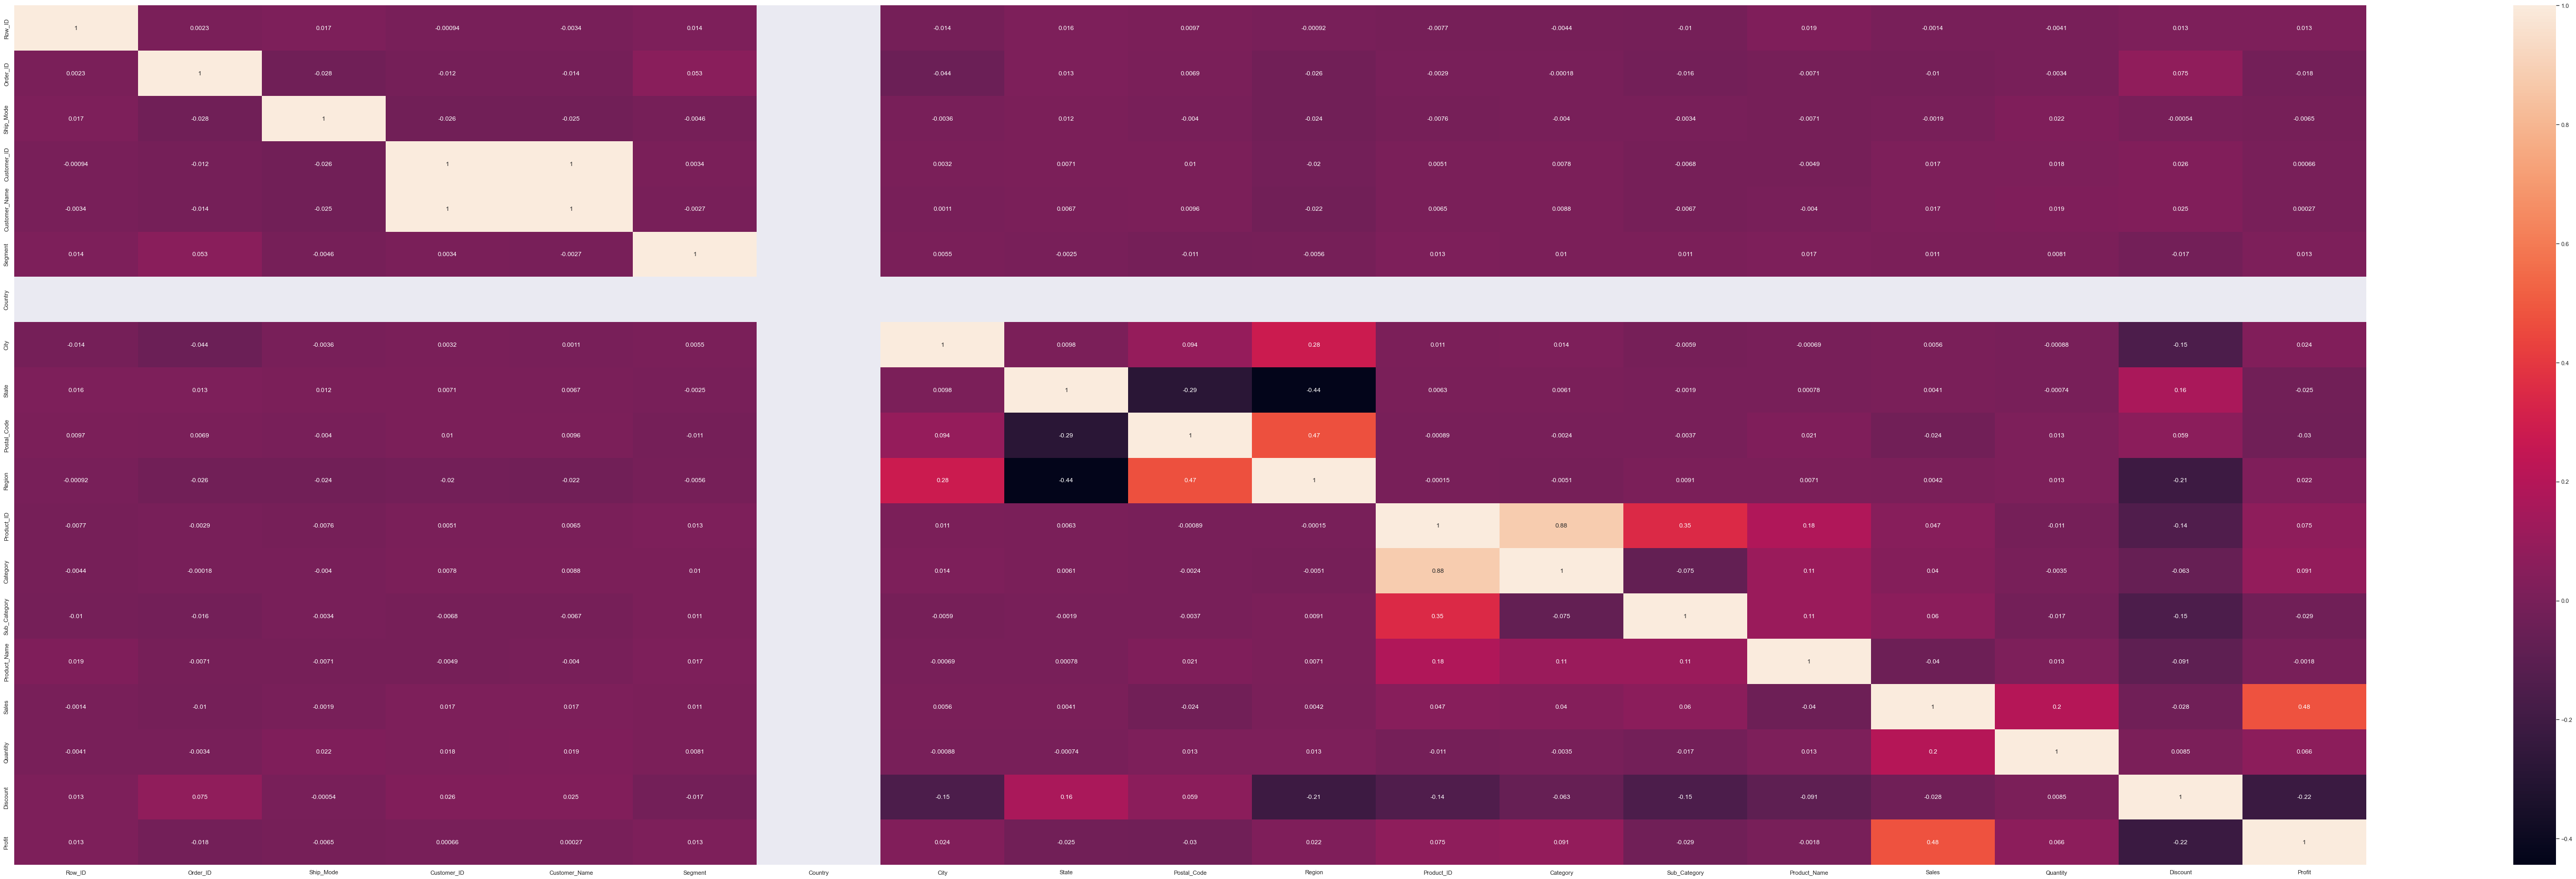

In [36]:
sns.heatmap(numarized.corr(),annot=True)
sns.set(rc={'figure.figsize':(100,70)})